In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

In [2]:
def time_sleep():
    
    time.sleep(0.5)


In [3]:
def initial_plot(v):

    # initial_plot
    fig, ax = plt.subplots()
    # Clear the plot and update it
    ax.clear()
    ax.scatter([x[0] for x in v], [y[1] for y in v], c='b', marker='o', label='Points')

    # Add labels and title
    ax.set_title('Scatter Plot of Points')

    # Display the plot in the notebook
    display(fig)
    clear_output(wait=True)
    
    return fig, ax

In [4]:
def initial_plot_updated(fig, ax, convex_hull):

    time_sleep()

    # draw Convex Hull points
    ax.scatter([x[0] for x in convex_hull], [y[1] for y in convex_hull], c = 'r', marker='o', label='Highlighted Points')

    # Draw a line between the highlighted points
    ax.plot([x[0] for x in convex_hull], [y[1] for y in convex_hull], 'k--', linewidth=1, label='Line between Highlighted Points')

    # Display the plot in the notebook
    display(fig)
    clear_output(wait=True)

    return fig, ax   

In [5]:
def update_plot(fig, ax, p1, p2, farthest_point):

    time_sleep()

    # draw Convex Hull points
    ax.scatter(farthest_point[0], farthest_point[1], c = 'r', marker='o')

    # Draw a line between the highlighted points
    ax.plot([farthest_point[0], p1[0]], [farthest_point[1], p1[1]], 'k--', linewidth=1)
    ax.plot([farthest_point[0], p2[0]], [farthest_point[1], p2[1]], 'k--', linewidth=1)


    # Display the plot in the notebook
    display(fig)
    clear_output(wait=True)

    return fig, ax   

In [6]:
def final_plot(fig, ax, convex_hull):

    time_sleep()

    # Convert convex_hull to numpy array for easier manipulation
    convex_hull = np.array(convex_hull)

    # Calculate polar coordinates (angle and radius) with respect to the center
    center = np.mean(convex_hull, axis=0)
    angles = np.arctan2(convex_hull[:, 1] - center[1], convex_hull[:, 0] - center[0])
    radii = np.sqrt((convex_hull[:, 0] - center[0])**2 + (convex_hull[:, 1] - center[1])**2)

    # Sort convex_hull based on angles
    sorted_indices = np.argsort(angles)
    sorted_convex_hull = convex_hull[sorted_indices]

    # Create a plot and add the sorted convex_hull
    x_coords = sorted_convex_hull[:, 0]
    y_coords = sorted_convex_hull[:, 1]
    # ax.scatter(x_coords, y_coords, c='b', marker='o', label='Sorted convex_hull')

    # Connect the convex_hull to form the circular shape
    ax.plot(np.append(x_coords, x_coords[0]), np.append(y_coords, y_coords[0]), 'r-',  linewidth=2, label='Circular Shape')

    # Display the plot in the notebook
    display(fig)
    clear_output(wait=True)


In [7]:
def find_distance(p1, p2, p3):

    # using the formula ax + by + c = 0
    a = p1[1] - p2[1]
    b = p2[0] - p1[0]
    c = p1[0] * p2[1] - p2[0] * p1[1]

    # use dot product to find the distance between a line and a point
    return abs( a * p3[0] + b * p3[1] + c) / math.sqrt(a * a + b * b)

In [8]:
def create_segment(p1, p2, v):

    above = []
    below = []

    if p2[0] - p1[0] == 0:
        return above, below
    
    #calculate m and o from y = mx + o
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    c = -m * p1[0] + p1[1]

    #loop through each coordinate and place it into the correct list
    for coordinate in v:

        #y > mx + o means it is above the line
        if coordinate[1] > m * (coordinate[0]) + c:
            above.append(coordinate)
        #y < mx + o means it is below the line
        elif coordinate[1] < m * (coordinate[0]) + c:
            below.append(coordinate)


    return above, below


In [9]:
def upper_lower_hull(fig, ax, p1, p2, segment, flag):

    if segment == [] or p1 is None or p2 is None:
        return []

    convex_hull = []

    # calculate the distance of every point from the line to find the farthest point
    farthest_distance = -1
    farthest_point = None

    for point in segment:

        distance = find_distance(p1, p2, point)

        if distance > farthest_distance:
            
            farthest_distance = distance
            farthest_point = point


    #update Plot 
    if farthest_point:
        
        convex_hull = convex_hull + [farthest_point]

        fig, ax = update_plot(fig, ax, p1, p2, farthest_point)



    # point is now in the convex hull so remove it from the segment
    segment.remove(farthest_point)

    # determine the segments formed from two lines p1-farthest_point and p2-farthest_point
    point1above, point1below = create_segment(p1, farthest_point, segment)
    point2above, point2below = create_segment(p2, farthest_point, segment)


    # only use the segmetns in the same direction, the opposite direction is contained in the convex hull
    if flag == "above":

        convex_hull = convex_hull + upper_lower_hull(fig, ax, p1, farthest_point, point1above, "above")
        convex_hull = convex_hull + upper_lower_hull(fig, ax, farthest_point, p2, point2above, "above")

    else:

        convex_hull = convex_hull + upper_lower_hull(fig, ax, p1, farthest_point, point1below, "below")
        convex_hull = convex_hull + upper_lower_hull(fig, ax, farthest_point, p2, point2below, "below")

    # print("Convex Hull in upper_lower_hull", convex_hull)

    return convex_hull


In [10]:
def quickhull(v):

    if len(v) <= 1:

        print("Es braucht mindestens 2 Punkte um eine Convexe Huelle zu erstellen")
        
        fig, ax = initial_plot(v)
        # exit()
        
    convex_hull = []

    sort = sorted(v, key = lambda x : x[0])

    p1 = sort[0]
    p2 = sort[-1]

    convex_hull = convex_hull + [p1, p2]
    
    if len(v) == 2:

        fig, ax = initial_plot(v)
        initial_plot_updated(fig, ax, convex_hull)

        return fig, ax, v

    # remove from the list as they are now in the convex hull
    sort.pop(0)
    sort.pop(-1)

    fig, ax = initial_plot(v)
    initial_plot_updated(fig, ax, convex_hull)
    
    #determine points above and below the line
    above, below = create_segment(p1, p2, sort)
    
    convex_hull = convex_hull + upper_lower_hull(fig, ax, p1, p2, above, "above")
    
    convex_hull = convex_hull + upper_lower_hull(fig, ax, p1, p2, below, "below")

    final_plot(fig, ax, convex_hull)

    return convex_hull

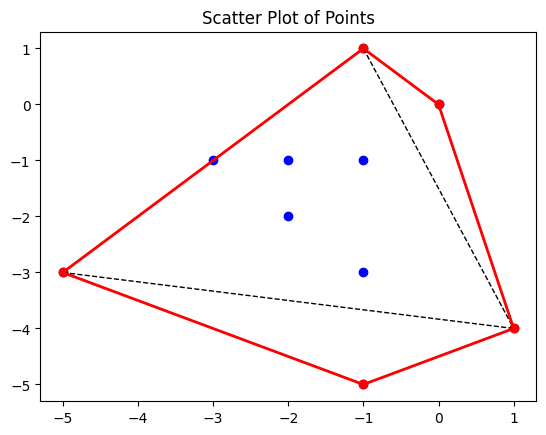

In [11]:
v = []

v.append([0, 0])
v.append([1, -4])
v.append([-1, -5])
v.append([-5, -3])
v.append([-3, -1])
v.append([-1, -3])
v.append([-2, -2])
v.append([-1, -1])
v.append([-2, -1])
v.append([-1, 1])


convex_hull = quickhull(v)